<a href="https://colab.research.google.com/github/pragya798/House-Price-Prediction-Advance-Regression-Technique/blob/main/Digit_Recoganizer_using_CNN_TensorFlow_(Accuracy_99_)%F0%9F%8E%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><span style="color:blue"><strong>Digit Recognizer</strong></span></center></h1>


<h4>Competition Guidelines</h4>


> The dataset is called MNIST and refers to handwritten digit recognition.
The dataset provides 70,000 images (28x28 pixels) of handwritten digits (1 digit per image).The goal is to write an algorithm that detects which digit is written. Since there are only 10 digits (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), this is a classification problem with 10 classes.Our goal would be to build a neural network with 2 hidden layer<center>
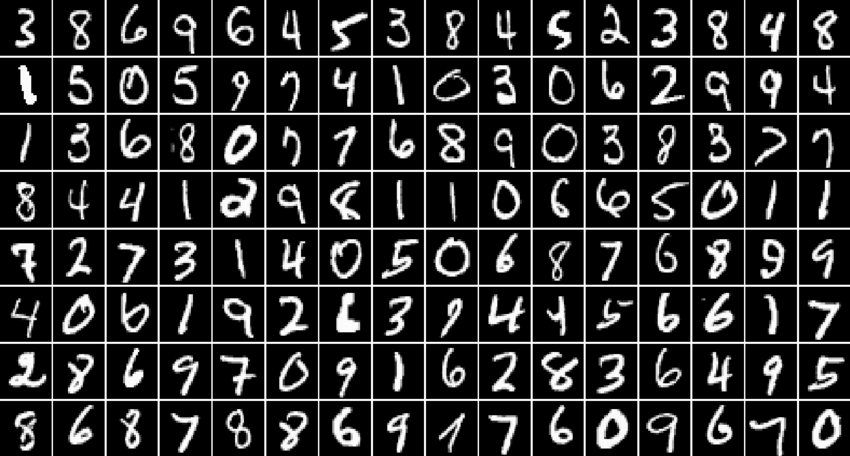</center>

<h4>The objective is to identify digits from a dataset of tens of thousands of hand written images.</h4>

> <h6>In this model, Convolutional Neural Network model has been developed using TensorFlow framework to recognition of handwritten digit.</h6> 



> <h6>Sequential Keras model which has two layers Convolutional2D and MaxPooling2D layer has been used. MaxPooling layer act as a sort of downsampling using max values instead of averaging. The last layer has a dense layer.</h6>


<h2><center>Importing Libraries</center></h2>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir -p ~/.kaggle
!cp '/content/drive/MyDrive/kaggle.json' ~/.kaggle/
#Changing permission
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c digit-recognizer


digit-recognizer.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!rm -rf test.csv.zip
!rm -rf train.csv.zip

<h4><center>Importing important libraries</center></h4>

<ul>
<li>Importing Libraries</li>
<li>Data Overview</li>
<li>Data Normalization</li>
<li>Data Visualization</li>
<li>Model Summary</li>
<li>Model Curve</li>
<li>Save and load model</li>
<li>Plot accuracy</li>
<li>Evaluation</li>
</ul>






<h4>Importing Libraries</h4>



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/train.csv")
test=pd.read_csv("/content/drive/MyDrive/test.csv")

<h4>Data Overview</h4>

In [ ]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


<h4>Data Normalization</h4>

In [ ]:
#Normalizing the value of pixcel of image
train_x=train.drop(['label'],axis=1).astype('int32')
train_y=train['label'].astype('float32')
test_x=test.astype('float32')
train_x.shape,train_y.shape,test_x.shape
#train=train.astype('float32')/255.0
#test=test.astype('float32')/255.0

((42000, 784), (42000,), (28000, 784))

In [ ]:
train_x= train_x.values.reshape(-1,28,28,1)
train_x=train_x/255.0
test_x=test_x.values.reshape(-1,28,28,1)
test_x=test_x/255.0
train_x.shape,test_x.shape 

((42000, 28, 28, 1), (28000, 28, 28, 1))

<h4>Data Visualization</h4>

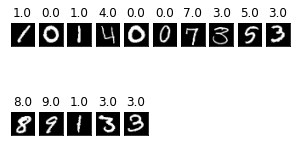

In [ ]:
fig=plt.figure(figsize=(5,3))
for i in range(15):
  ax=fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(train_x[i]),cmap='gray')
  ax.set_title(train_y[i])

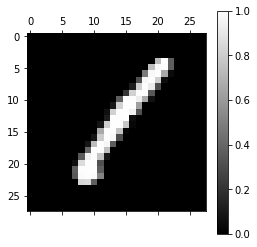

In [ ]:
#Verify the normalization work
plt.matshow(train_x[0,:,:,0],cmap='gray')
plt.colorbar()
plt.show()

<h3>One Hot Enconder</h3>

In [ ]:
train_y=tf.keras.utils.to_categorical(train_y,10)
train_y.shape

(42000, 10)

In [ ]:
#One hot encoder of same label
print(train_y[0:5,:])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


<h3>Defining the model</h>

In [ ]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='Same'),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='Same'),
                                  tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
                                  tf.keras.layers.Dropout(0.25),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='Same'),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='Same'),
                                  tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
                                  tf.keras.layers.Dropout(0.25),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(256,activation='relu'),
                                  tf.keras.layers.Dense(256,activation='relu'),
                                  tf.keras.layers.Dropout(0.50),
                                  tf.keras.layers.Dense(10,activation='softmax')
                                  ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                  

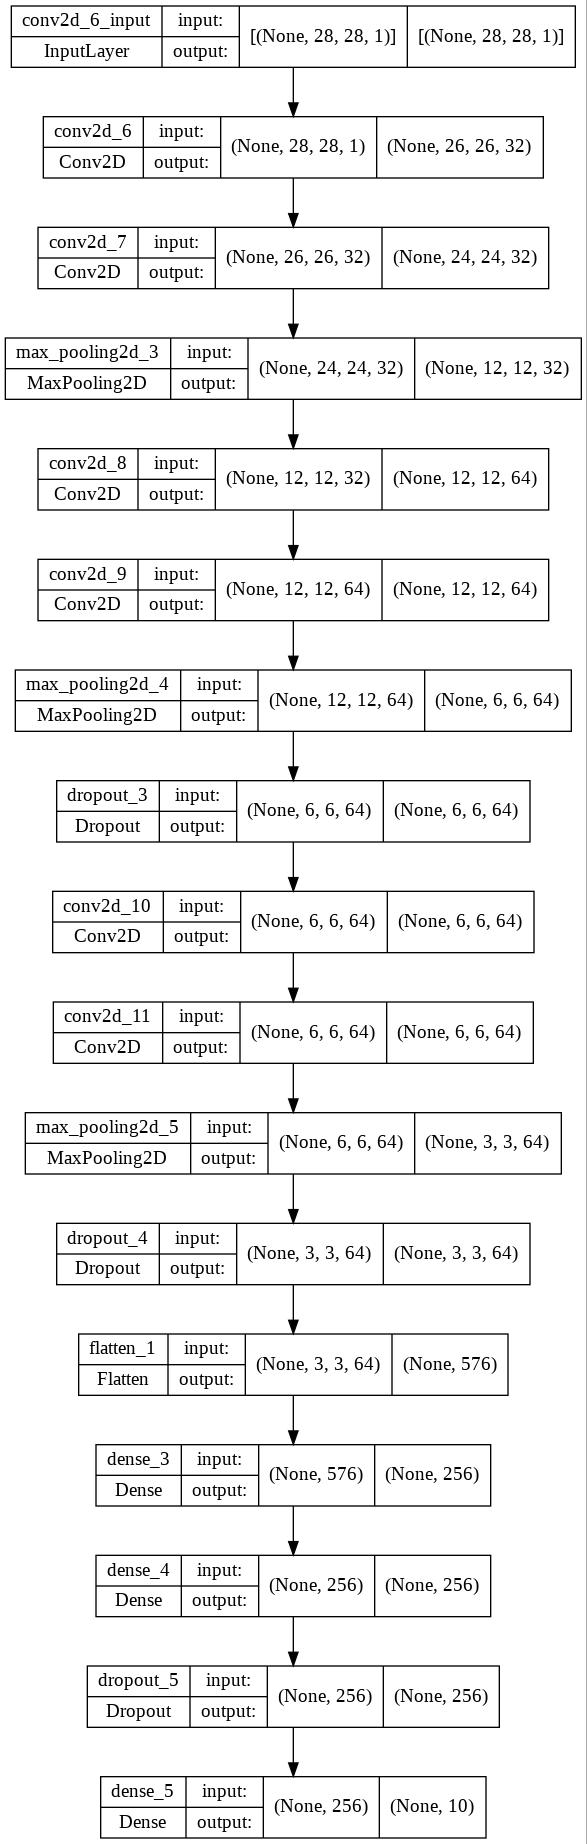

In [ ]:
tf.keras.utils.plot_model(model,'model.jpg',show_shapes=True)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nTraining is cancelled because you reached 99.9%")
      self.model.stop_training = True

callbacks=myCallback()

In [ ]:
Optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005,
                                   beta_1=0.9,
                                   beta_2=0.999,
                                   epsilon=1e-07,
                                   name='Adam')
model.compile(optimizer=Optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_x,train_y,batch_size=50,epochs=20,callbacks=[callbacks])

Epoch 1/20
840/840 [==============================] - 159s 184ms/step - loss: 0.3377 - accuracy: 0.8862
Epoch 2/20
840/840 [==============================] - 148s 176ms/step - loss: 0.0847 - accuracy: 0.9756
Epoch 3/20
840/840 [==============================] - 145s 173ms/step - loss: 0.0599 - accuracy: 0.9826
Epoch 4/20
840/840 [==============================] - 147s 175ms/step - loss: 0.0474 - accuracy: 0.9862
Epoch 5/20
840/840 [==============================] - 145s 173ms/step - loss: 0.0398 - accuracy: 0.9886
Epoch 6/20
840/840 [==============================] - 148s 176ms/step - loss: 0.0353 - accuracy: 0.9899
Epoch 7/20
840/840 [==============================] - 145s 173ms/step - loss: 0.0330 - accuracy: 0.9898
Epoch 8/20
840/840 [==============================] - 147s 176ms/step - loss: 0.0293 - accuracy: 0.9911
Epoch 9/20
840/840 [==============================] - 147s 175ms/step - loss: 0.0245 - accuracy: 0.9930
Epoch 10/20
840/840 [==============================] - 145s 173m

<h3>Model Curves</h3>

In [ ]:
print(history.params)

{'verbose': 1, 'epochs': 20, 'steps': 840}


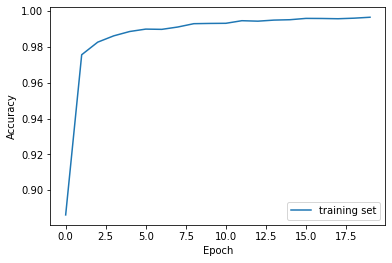

In [ ]:

plt.plot(history.history['accuracy'],label='training set')
#plt.plot(history.history['loss'],label='validation set')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training data','validation data'],loc='lower right')
plt.legend()

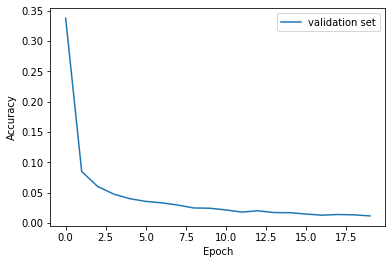

In [ ]:

plt.plot(history.history['loss'],label='validation set')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training data','validation data'],loc='lower right')
plt.legend()

In [ ]:
results=model.predict(test_x)
results=np.argmax(results,axis=1)
results=pd.Series(results,name='Label')

In [ ]:
submission=pd.concat([pd.Series(range(1,28001),name='ImageId'),results],axis=1)
submission.to_csv("submission.csv",index=False)

In [ ]:
#Submitting the results on Kaggle
!kaggle competitions submit -c digit-recognizer -f submission.csv -m "Message"


100% 208k/208k [00:02<00:00, 95.8kB/s]
Successfully submitted to Digit Recognizer